<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | Python: Programação Orientada a Objetos
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [1]:
!pip install wget==3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=962e04ec94045688185fe894a74516c5c50bf3d6f661ced5f5452026f1fbd9d8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [2]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [4]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [5]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [6]:
!pip install pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 31.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


Vamos importar o pacote com o apelido (alias) `pd`.

In [7]:
import pandas as pd

Estamos prontos para ler o arquivo.

In [8]:
df = pd.read_csv('./dados/dow_jones_index.csv')

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [9]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [10]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [11]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [12]:
df_mcd = df[df['stock'] == 'MCD']

 - Selecionando apenas as colunas de data e valores de ações.

In [13]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [14]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [15]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [16]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [17]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [18]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [19]:
df_KO = df[df['stock'] == 'KO'] # extração e tratamento dos dados da empresa Coca-Cola.

Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [20]:
df_KO = df_KO[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [21]:
df_KO.head(n=10) # Visualize os dados do dataframe

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [22]:
df_KO.dtypes # Verifique o tipo dos dados

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [23]:
for col in ['open', 'high', 'low', 'close']:
  df_KO[col] = df_KO[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [28]:
df_KO.head(n=8) # Visualize novamente os dados do dataframe

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31


In [25]:
df_KO.dtypes # Verifique novamente o tipo dos dados

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [26]:
!pip install seaborn==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 23.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


Vamos importar o pacote com o apelido (alias) `sns`.

In [29]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

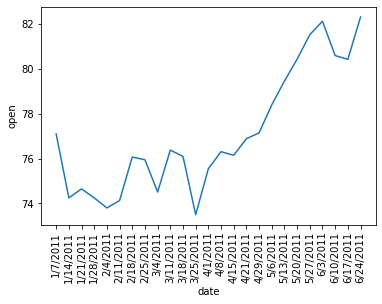

In [30]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

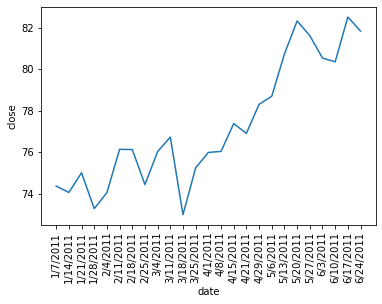

In [31]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

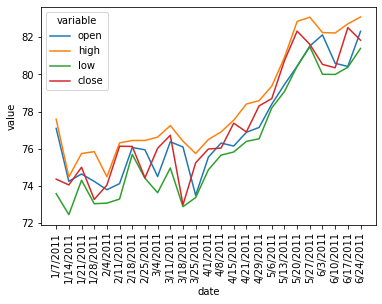

In [32]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [33]:
plot.figure.savefig("./mcd.png")

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

In [38]:
df_KO.head(n=8) # visualização dos dados da Coca-Cola.

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31


Vamos visualizar os valores de abertura das ações ao longo do tempo.

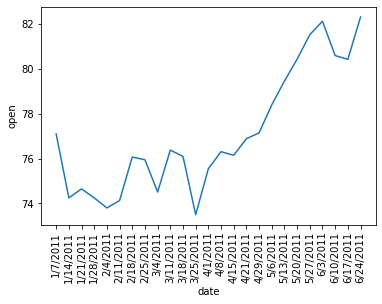

In [39]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

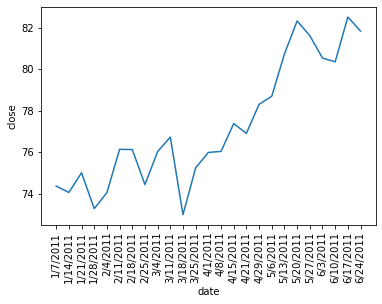

In [40]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

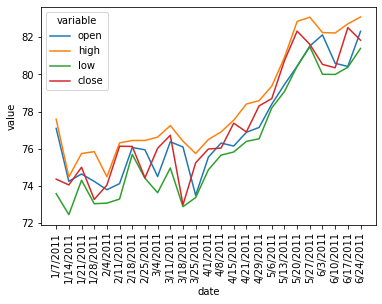

In [41]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [42]:
plot.figure.savefig("./ko.png")

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

**Insight #1**: As curvas de variação dos valores das ações do MCD e da KO seguem a mesma tendência.

Insight #2: De uma forma geral não há muita variação entre os valores de abertura e fechamento.

---